#### clustering of embeddings with HDBSCAN using t-SNE for dimensionality reduction + visualization 

In [2]:
import pickle
import seaborn as sns
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# with open('data/vb_obj_ftext_ner.pkl', 'rb') as f:
#     vo_rep = pickle.load(f)
    
with open('data/sent_emb.pkl', 'rb') as f: # {text1 : text_vector1, text2: text_vec2, ..}
    sent_dict = pickle.load(f)
    sentv = []
    label = []
    for k,v in sent_dict.items():
        sentv.append(v)
        label.append(k)

from sklearn.decomposition import PCA
# X = PCA(n_components=50).fit_transform(vo_rep)
sX = PCA(n_components=50).fit_transform(sentv)

from sklearn.preprocessing import StandardScaler
# vo_rep = StandardScaler().fit_transform(X)
sX = StandardScaler().fit_transform(sX)

In [4]:
print(len(label))

4016


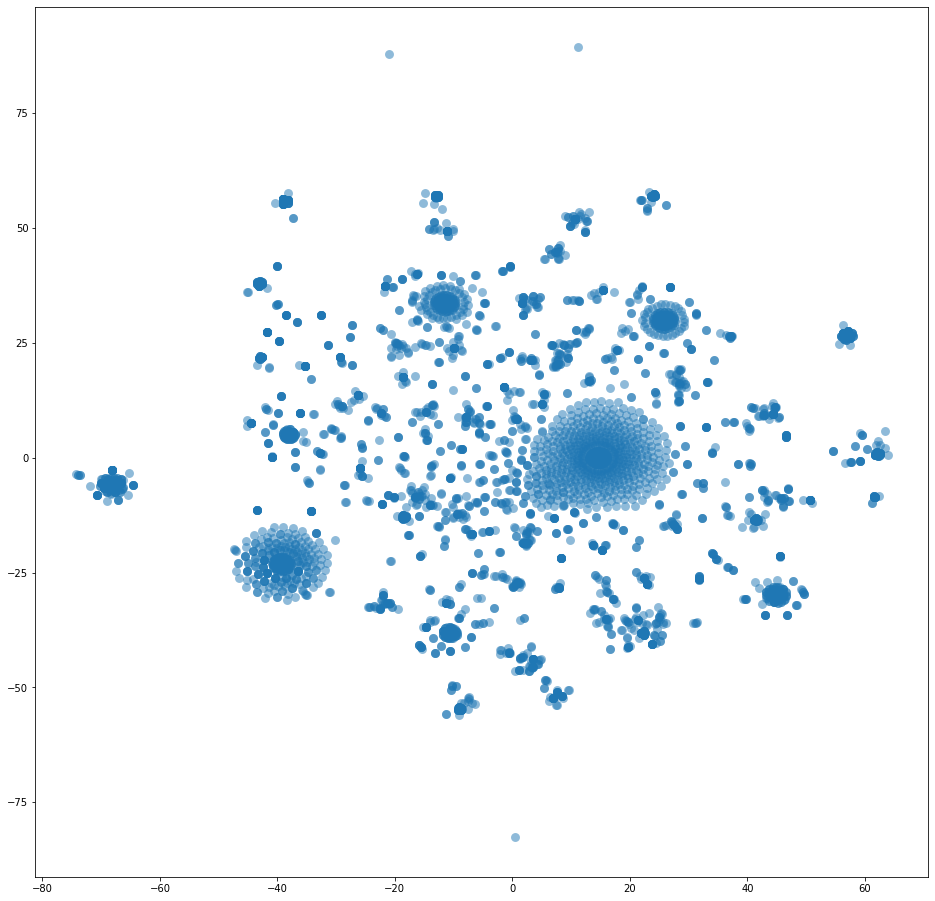

In [5]:
# 2D projection using TSNE (TODO: experiment with UMAP)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
projection = TSNE().fit_transform(sX)
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, **plot_kwds)

38
38


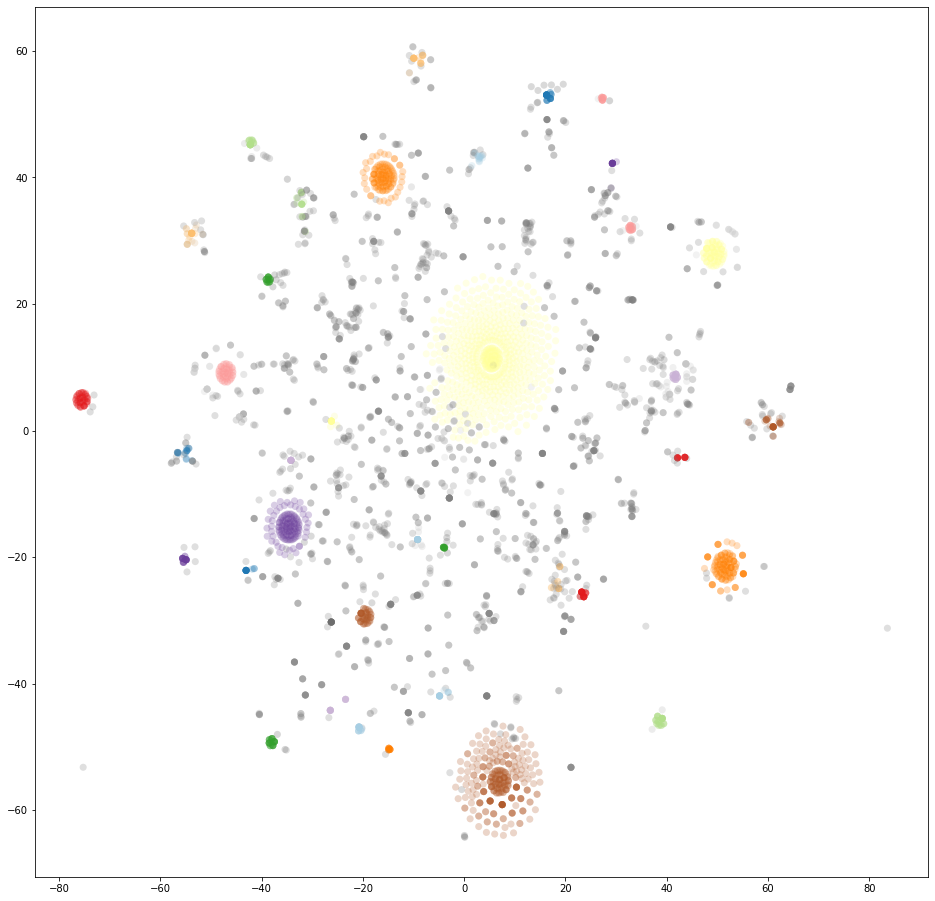

In [63]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(sX)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
print(len(color_palette))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

16


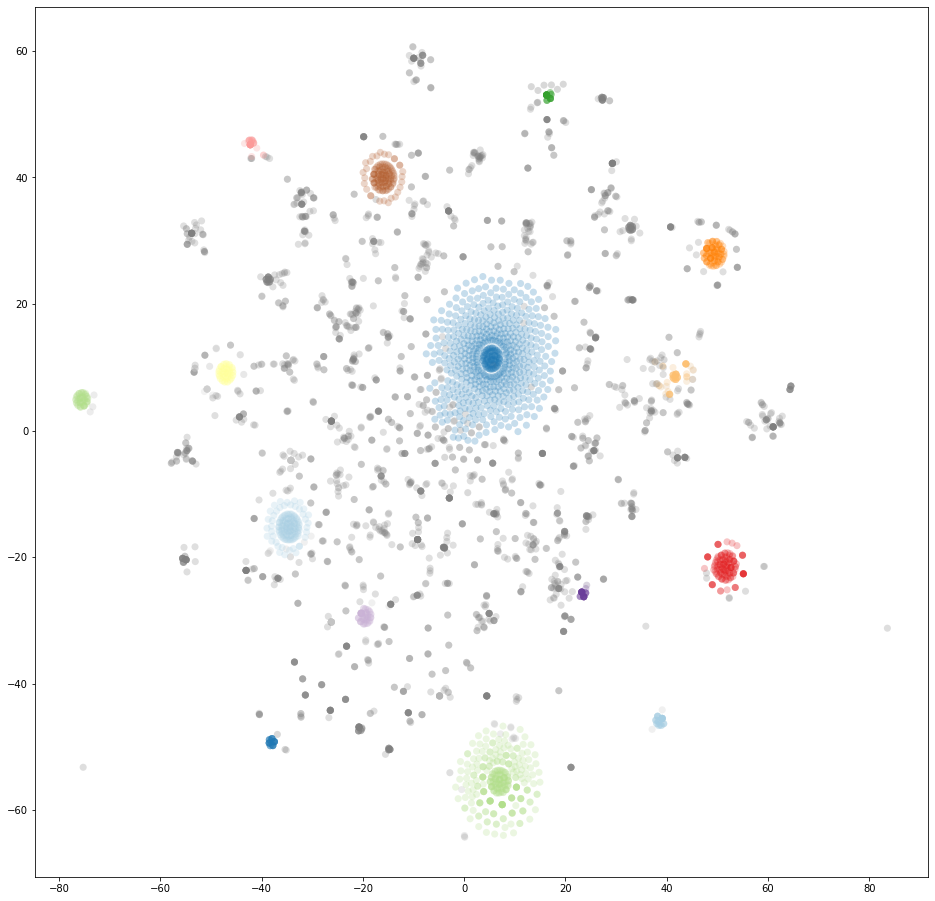

In [64]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(sX)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

9


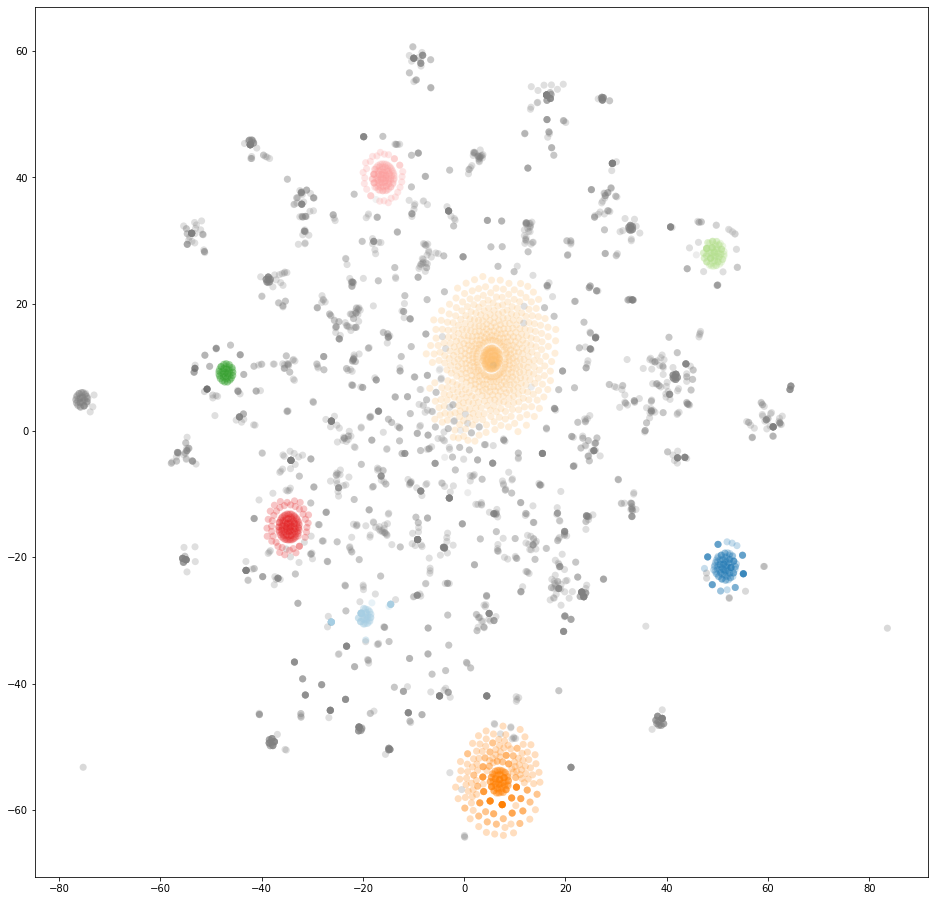

In [66]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(sX)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired',len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [99]:
# get top k clusters with top terms  
def get_top_clusters(clusterer, k):
    from collections import defaultdict
    from operator import itemgetter

    top_terms = defaultdict(list)
    
    for lab, prob, text_lab in zip(clusterer.labels_, clusterer.probabilities_, label):
        top_terms[lab].append((prob, text_lab))

    for x in top_terms:
        top_terms[x].sort(reverse=True, key=itemgetter(0)) # sort the pair based on probability 
#         print(x, len(top_terms[x]))

    top10_labels = sorted(top_terms, key=lambda k: len(top_terms[k]), reverse=True)
    topklab = set(top10_labels[:k]) # a set of top 10 cluster labels with label -1 (for noise)

    for el in top_terms:
        if el in top10lab:
            print(el, top_terms[el][:10])
            
    return top_terms, topklab # {lab1: (prob, [term1, term2,..]), }, {denseClusterLabel1,..}
        
get_top_clusters(clusterer, 11)

-1 [(0.0, 'who is person church ?'), (0.0, 'learn more person person'), (0.0, 'learn more westmoreland county, administrativearea westmoreland county, administrativearea'), (0.0, 'who is person kleiner?'), (0.0, 'is city in germany?'), (0.0, 'is city in country?'), (0.0, 'is place in lithuania?'), (0.0, 'is place in country?'), (0.0, 'where is city ?'), (0.0, 'tell me about dr person')]
61 [(1.0, 'where is country s capital?'), (1.0, 'who is place je in?'), (1.0, 'learn more prime minister of the country prime minister of the country'), (1.0, 'load related prime minister of the country prime minister of the country'), (1.0, 'learn more organization organization'), (1.0, 'load similar organization organization'), (1.0, 'load related organization organization'), (1.0, 'about organization din'), (1.0, 'who is dolnd person'), (1.0, 'how old is person?')]
62 [(1.0, 'how old person is?'), (1.0, 'who is creativework?'), (1.0, 'could you tell me about the best creativework mortadelo has ever u

(defaultdict(list,
             {-1: [(0.0, 'who is person church ?'),
               (0.0, 'learn more person person'),
               (0.0,
                'learn more westmoreland county, administrativearea westmoreland county, administrativearea'),
               (0.0, 'who is person kleiner?'),
               (0.0, 'is city in germany?'),
               (0.0, 'is city in country?'),
               (0.0, 'is place in lithuania?'),
               (0.0, 'is place in country?'),
               (0.0, 'where is city ?'),
               (0.0, 'tell me about dr person'),
               (0.0, 'towns in place'),
               (0.0, 'towns in administrativearea'),
               (0.0, 'how much bigger is city than city?'),
               (0.0,
                'what is a green cloudy object in space discovered by a girl in the country'),
               (0.0, 'how many children had alber person'),
               (0.0, 'what is the birthplace of person'),
               (0.0, 'what year did cr

65
[ -8.105221   -0.6737612   2.2406065 ... -10.723197   -3.9974203
 -33.421898 ] [ 17.700298   -1.2245084   4.0021257 ...  23.167648  -16.03693
 -16.37942  ]
-1 [(0.0, 'who is person church ?'), (0.0, 'learn more person person'), (0.0, 'learn more westmoreland county, administrativearea westmoreland county, administrativearea'), (0.0, 'who is person kleiner?'), (0.0, 'is city in germany?'), (0.0, 'is city in country?'), (0.0, 'is place in lithuania?'), (0.0, 'is place in country?'), (0.0, 'where is city ?'), (0.0, 'tell me about dr person')]
61 [(1.0, 'where is country s capital?'), (1.0, 'who is place je in?'), (1.0, 'learn more prime minister of the country prime minister of the country'), (1.0, 'load related prime minister of the country prime minister of the country'), (1.0, 'learn more organization organization'), (1.0, 'load similar organization organization'), (1.0, 'load related organization organization'), (1.0, 'about organization din'), (1.0, 'who is dolnd person'), (1.0, '

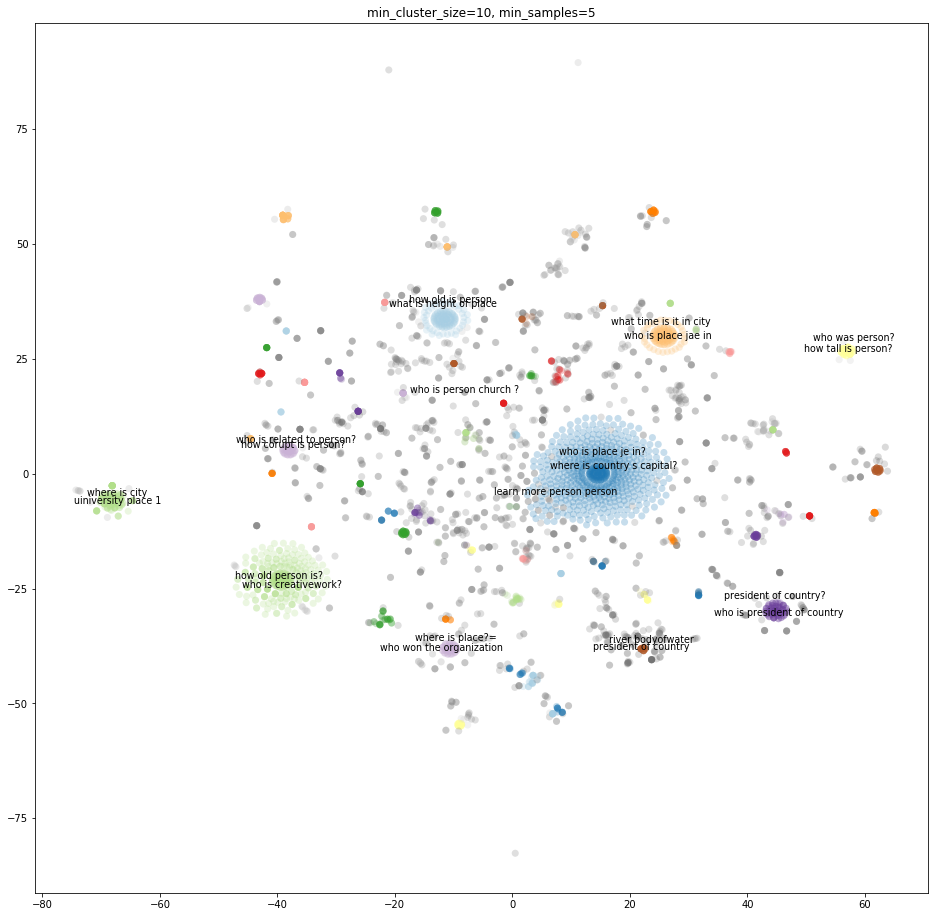

In [97]:
from collections import Counter
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5).fit(sX)
print(len(set(clusterer.labels_)))


x, y = projection.T
print(x, y)

color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.title('min_cluster_size=10, min_samples=5')

plot_top=defaultdict(set)

# label 10 dense clusters with top 5 terms
top_terms, topklab = get_top_clusters(clusterer,10)

for i, l, p in zip(range(len(clusterer.labels_)),clusterer.labels_, clusterer.probabilities_): # pointwise iteration
    if l in top10lab and len(plot_top[l]) < 2:
#         print(plot_top[l])
        d = 1
        for el in top_terms[l][:10]:
            if p == el[0]:
                if len(el[1]) < 30 and el[1] not in plot_top[l]:
                    print(l, plot_top[l])
                    plot_top[l].add(el[1])
                    plt.annotate(el[1], (x[i]+len(plot_top[l])-d,y[i]+1.5*len(plot_top[l])-d), horizontalalignment='center', verticalalignment='center', size=9.5)
                    d *= 1.2
                    break
        

plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)


plt.savefig('data/temp-2labels.png')

In [98]:
# for k,v in top_terms.items():
#     print(f'top 5 terms in cluster {k}: {v[:5]}')